In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as scop
import csv
import matplotlib as mpl
import os

In [12]:


#LOADING FUNCTION
def load_data(file_location, file_name, Dimension=1):
    """
    Load a csv file from SSNake analysed dataset

    Parameters
    ----------
    file_location : str
        Directory where the data file is stored.
    file_name : str
        Name of the data file.
    Dimension : int, optional
        Dimension of the data (1D or 2D). Default is 1.

    Returns
    -------
    df : pd.DataFrame
        dataframe containing the data.
    
    """
    FILEANDPATH = file_location+file_name

    # Find where headers start 
    index_of_headers = 0
    for i in range(100):
        try:
            _ = pd.read_csv(FILEANDPATH, sep=",", skiprows=i, encoding="unicode_escape")
            index_of_headers = i + 1  # need +1 for correct parsing
            break
        except Exception:
            continue

    # Load dataframe properly
    df_raw = pd.read_csv(FILEANDPATH, sep=",", skiprows=index_of_headers, encoding="unicode_escape")

    
    
    return df_raw, index_of_headers

#SAVE PLOT FUNCTION


def save_next_plot(save_folder, prefix="graph", ext="png", fig=None):
    """
    Save the current matplotlib figure into 'folder' with auto-increment filename.
    
    Parameters
    ----------
    save_folder : str
        Path to the folder where plots will be saved.
    prefix : str, default 'graph'
        Filename prefix, e.g. 'graph' -> graph_001.png
    ext : str, default 'png'
        File extension, e.g. 'png', 'pdf', 'svg'.
    fig : matplotlib.figure.Figure, optional
        Figure to save. Defaults to current figure.
        
    Returns
    -------
    str
        Full path of the saved file.
    """
    os.makedirs(save_folder, exist_ok=True)
    
    existing = [f for f in os.listdir(save_folder) if f.startswith(prefix) and f.endswith("." + ext)]
    numbers = []
    for f in existing:
        try:
            num = int(f.replace(prefix + "_", "").replace("." + ext, ""))
            numbers.append(num)
        except ValueError:
            continue
    
    next_num = max(numbers) + 1 if numbers else 1
    filename = f"{prefix}_{next_num:03d}.{ext}"
    fullpath = os.path.join(save_folder, filename)
    
    if fig is None:
        fig = plt.gcf()
    
    fig.savefig(fullpath, dpi=300, bbox_inches="tight")
    print(f"Plot saved as: {fullpath}")
    
    return fullpath

# PLOTTING FUNCTION
def plot_data(df, x_col, y_col, title, x_label="x", y_label="y",
              ylimits=None, xlimits=None,
              title_fs=24, label_fs=20, tick_fs=18, legend_fs=18):
    """
    Scatter-plots df[x_col] vs df[y_col].
    x_col and y_col can be column names or integer column indices.
    """

    # Allow integer indices
    if isinstance(x_col, int):
        x_col = df.columns[x_col]
    if isinstance(y_col, int):
        y_col = df.columns[y_col]

    x = df[x_col]
    y = df[y_col]

    plt.figure(figsize=(18, 10))

    plt.scatter(
        x, y, s=10,
        facecolors='none',
        edgecolors='b',
        label='Data Points'
    )
    #plt.plot(x, y, 'r-', label='Data Line')

    plt.title(title, fontsize=title_fs)
    plt.xlabel(x_label, fontsize=label_fs)
    plt.ylabel(y_label, fontsize=label_fs)

    plt.xlim(xlimits)
    plt.ylim(ylimits)

    plt.grid(True)

    plt.xticks(fontsize=tick_fs)
    plt.yticks(fontsize=tick_fs)

    plt.legend(fontsize=legend_fs)
    plt.show()



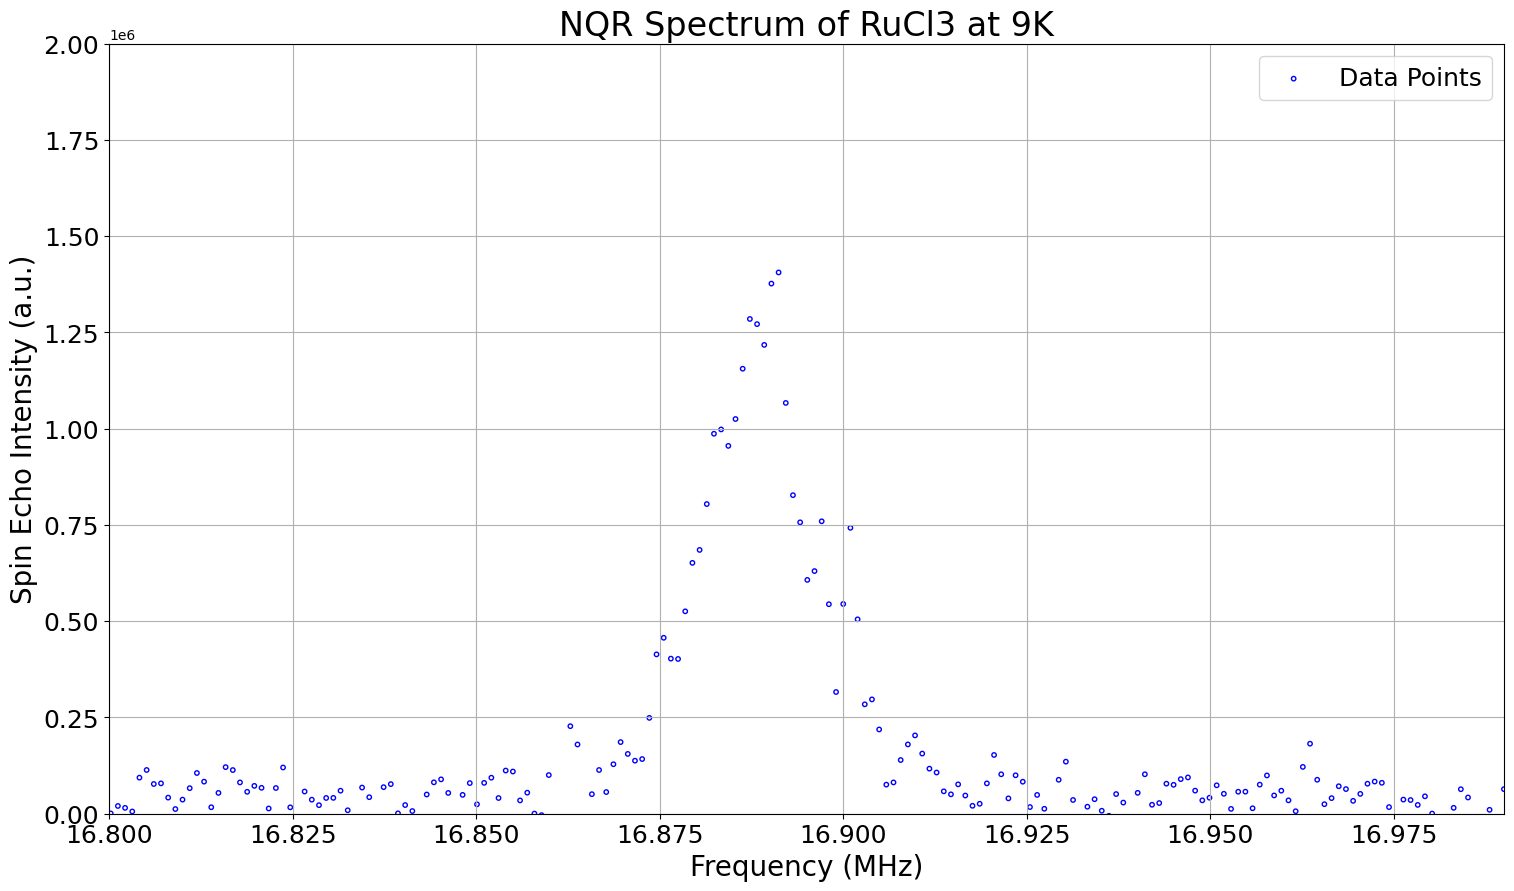

In [13]:

#df,_ = load_data("C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Data/RuCl3/Data/NMR_NQR/RuCl3_NQR_November_2025/Processed/","866_Spectra_FFT.csv")
df,_ = load_data("C:/Users/thoma/Documents/Python Scripts/strain-cell/strain-cell/PPMS_Data_and_Plotting/Data/RuCl3/Data/NMR_NQR/RuCl3_NQR_November_2025/Processed//","866_Spectra_FFT.csv")
df[df.columns[0]] = df[df.columns[0]] / 1000
df[df.columns[0]]=df[df.columns[0]]+16.9

plot_data(df, 0, 1, "NQR Spectrum of RuCl3 at 9K",x_label="Frequency (MHz)",y_label="Spin Echo Intensity (a.u.)", xlimits=(16.8,16.99), ylimits=(0, 2e6))
